In [1]:
from util import haversine
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import griddata

In [2]:
df = pd.read_csv("alltransects.csv")

In [3]:
def create_datasets(df, transect_number):
    transect = df[df['transect'] == transect_number]
    numpy_long = pd.Series.to_numpy(transect['longitude'])
    numpy_lat = pd.Series.to_numpy(transect['latitude'])
    numpy_dist = np.zeros([len(numpy_long), 1])
    haver = haversine(numpy_lat, numpy_long)
    numpy_dist[0] = 0.0
    for i in range(1,len(numpy_long)):
        numpy_dist[i] = numpy_dist[i-1] + haver[i-1]
    transect['distance'] = numpy_dist
    grid_x, grid_y = np.mgrid[0:max(transect['distance']):1000j, 0:max(transect['rangetobot']):1000j]
    oxy_interp = griddata((transect['distance'], transect['rangetobot']), transect['oxygen'], (grid_x, grid_y), method='linear')
    return transect, oxy_interp

In [17]:
def make_plots(subset_df, oxy_df, transect_number):
    plt.figure()
    plt.imshow(oxy_df.T, extent=(0,max(subset_df['distance']),0,max(subset_df['rangetobot'])), origin='lower', aspect = 'auto', cmap='viridis')
    plt.colorbar(label = "Oxygen [\u03BCmol/L]")
    plt.title("Transect {:d} Interpolation".format(transect_number))
    plt.xlabel("Transect Distance [km]")
    plt.ylabel("Depth above seafloor [m]")
    plt.show()

    plt.figure()
    plt.scatter(subset_df['distance'], subset_df['rangetobot'], c=subset_df['oxygen'])
    plt.colorbar(label = "Oxygen [\u03BCmol/L]")
    plt.title("Transect {:d} Original Data".format(transect_number))
    plt.xlabel("Transect Distance [km]")
    plt.ylabel("Depth above seafloor [m]")
    plt.show()

<ipython-input-3-5e5fd52a4bdb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transect['distance'] = numpy_dist


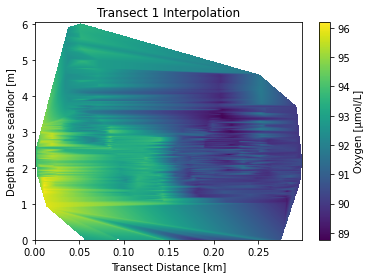

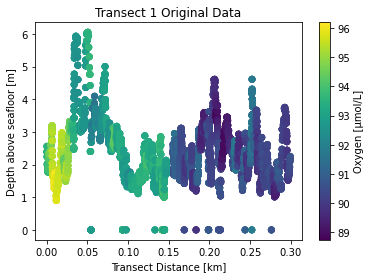

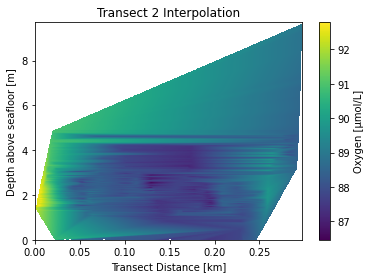

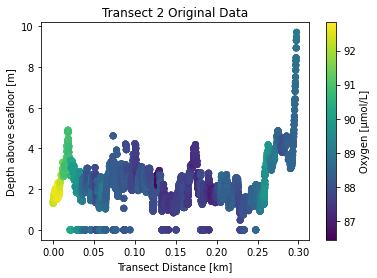

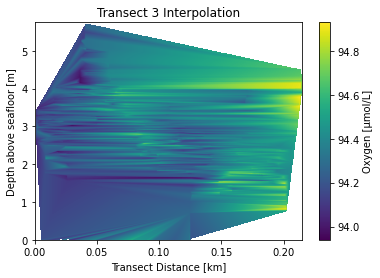

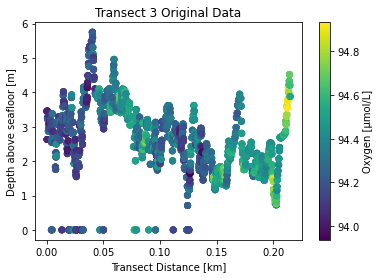

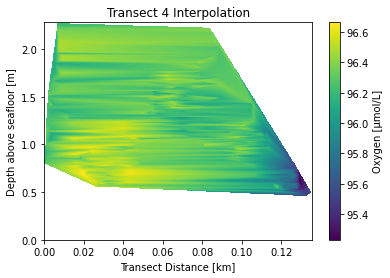

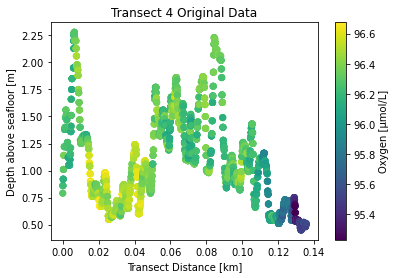

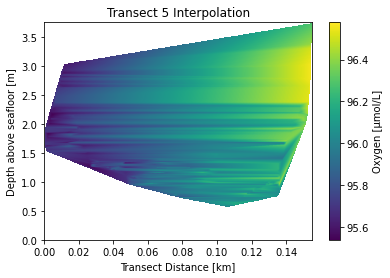

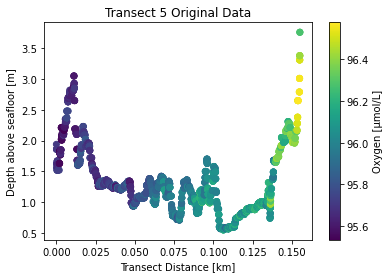

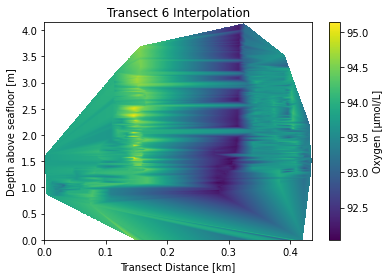

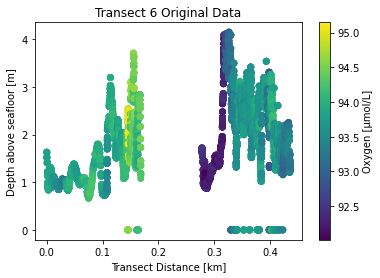

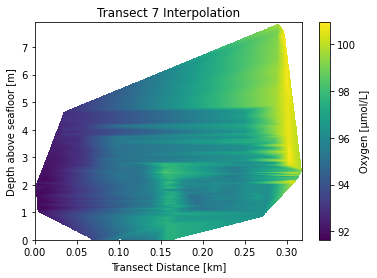

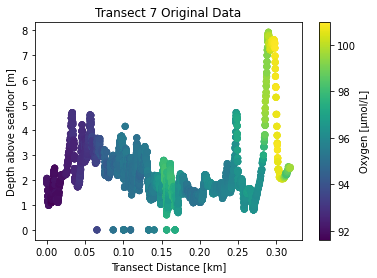

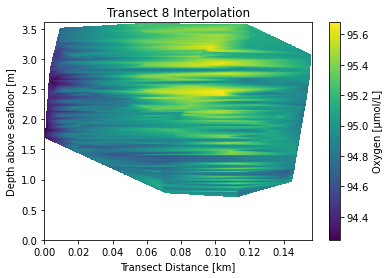

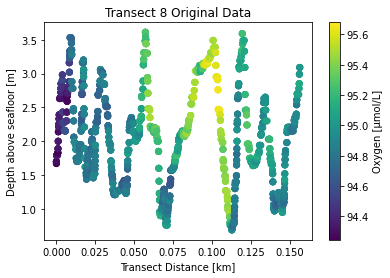

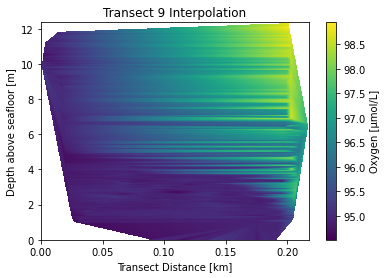

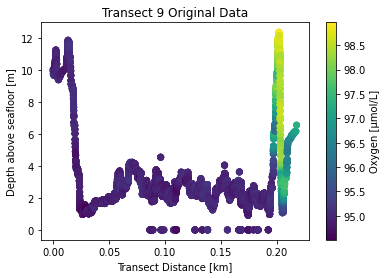

In [18]:
for i in np.unique(df['transect']):
    transect, oxy_interp = create_datasets(df, i)
    make_plots(transect, oxy_interp, i)